In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [47]:
NUM_CLASSES = 10

# 学習データ読み込み

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.0312 - loss: 2.5728
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0514 - loss: 2.5022 - val_accuracy: 0.0895 - val_loss: 2.2672
Epoch 2/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1172 - loss: 2.3422
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1441 - loss: 2.2663 - val_accuracy: 0.3068 - val_loss: 2.0895
Epoch 3/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2109 - loss: 2.1664
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2720 - loss: 2.0810 - val_accuracy: 0.4165 - val_loss: 1.8379
Epoch 4/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4375 - loss: 1.8420
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [56]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.3824 


In [57]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [58]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[3.50453448e-03 1.37009323e-02 8.43101680e-01 1.48363242e-07
 1.23206526e-01 1.22191093e-03 1.31199660e-04 1.60906615e-03
 2.26256350e-04 1.32978130e-02]
2


# 混同行列

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


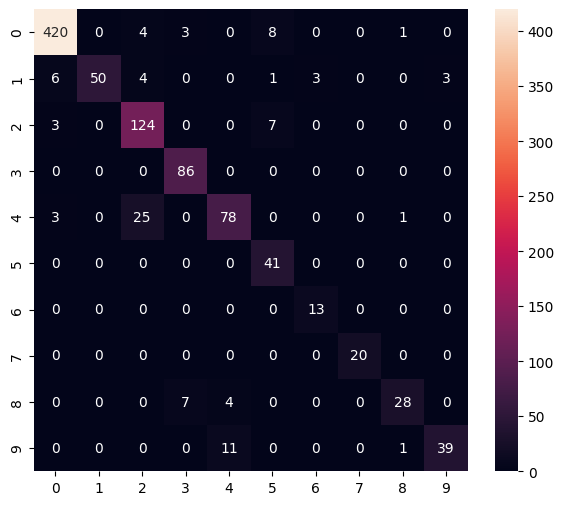

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       436
           1       1.00      0.75      0.85        67
           2       0.79      0.93      0.85       134
           3       0.90      1.00      0.95        86
           4       0.84      0.73      0.78       107
           5       0.72      1.00      0.84        41
           6       0.81      1.00      0.90        13
           7       1.00      1.00      1.00        20
           8       0.90      0.72      0.80        39
           9       0.93      0.76      0.84        51

    accuracy                           0.90       994
   macro avg       0.89      0.88      0.88       994
weighted avg       0.91      0.90      0.90       994



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [60]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [61]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmp0skfsue_\assets


INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmp0skfsue_\assets


Saved artifact at 'C:\Users\JELLYF~1\AppData\Local\Temp\tmp0skfsue_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2213775982032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2213794874960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2213794886480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2213794878992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2213794875344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2213794882256: TensorSpec(shape=(), dtype=tf.resource, name=None)


6820

# 推論テスト

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\JellyFish\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [63]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.5045356e-03 1.3700938e-02 8.4310162e-01 1.4836351e-07 1.2320662e-01
 1.2219121e-03 1.3119978e-04 1.6090667e-03 2.2625655e-04 1.3297824e-02]
2
